In [89]:
import pandas as pd
"""Shows data before it is changed"""
data = pd.read_csv("Sleep_health_and_lifestyle_dataset_no_duplicates.csv")
print(data.to_string())

     Gender   Age   Occupation             Sleep Duration   Quality of Sleep   Physical Activity Level   Stress Level   BMI Category    Blood Pressure   Heart Rate   Daily Steps  Sleep Disorder
0    Male       27  Software Engineer                  6.1                  6                        42              6  Overweight      126/83                    77          4200            NaN
1    Male       28  Doctor                             6.2                  6                        60              8  Normal          125/80                    75         10000            NaN
2    Male       28  Sales Representative               5.9                  4                        30              8  Obese           140/90                    85          3000    Sleep Apnea
3    Male       28  Software Engineer                  5.9                  4                        30              8  Obese           140/90                    85          3000       Insomnia
4    Male       29  Teacher   

In [90]:
# Fjern mellemrum i kolonnenavne
data.columns = data.columns.str.strip()

# Fjern ekstra mellemrum i værdierne i 'BMI Category'
data['BMI Category'] = data['BMI Category'].str.strip()

In [91]:
"""BMI category ordinal encoding"""
weight_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Normal Weight': 1,
    'Overweight': 2,
    'Obese': 3
}
#Sætter de nye grænseværdier
data['Weight_Category_BMI'] = data['BMI Category'].map(weight_mapping)

In [92]:
#Ændre køn til 0 = kvinde 1 = mand
gender_mapping = {
    'Female': 0,
    'Male': 1
}

#Indsætter den nye kolonne som skal erstatte Gender i det endelige resultat af databehandling
data['Gender_Numerical'] = data['Gender'].str.strip().map(gender_mapping)


In [93]:
# Scaler 'Physical Activity Level' colonnen, så den er mellem 1-10
data['Physical Activity Level (scaled)'] = 1 + (data['Physical Activity Level'] - 1) * (10 - 1) / (100 - 1)

In [94]:
# Scaler 'Heart Rate' colonnen, så den er mellem 1-10
data['Heart Rate (scaled)'] = 1 + (data['Heart Rate'] - 1) * (10 - 1) / (100 - 1)

In [95]:
# Scaler 'Daily Steps' colonnen, så den er mellem 1-10
data['Daily Steps (scaled)'] = 1 + (data['Daily Steps'] - 1) * (10 - 1) / (10000 - 1)

In [96]:
# Scaler 'Age' colonnen, så den er mellem 1-10
data['Age (scaled)'] = 1 + (data['Age'] - 1) * (10 - 1) / (100 - 1)

In [97]:
"""Binary stress 0 = not stressed 1 = stressed"""
# Sørger for at gruppere stress i 2 kategorier 'Stress Level': 0 for ikke stresset (1-5), 1 for stresset (6-10)
data['Stress_Binary'] = data['Stress Level'].apply(lambda x: 1 if 6 <= x <= 10 else 0)

In [98]:
"""Fjerner irrelevante kolonner, der er mange, da nye bliver lavet længere oppe, her fjerne vi dem som er enten irrelevante eller som er lavet om"""
# Remove the 'User_ID and age' column
data = data.drop(columns=["Occupation", "Sleep Disorder", "Blood Pressure", "BMI Category", "Physical Activity Level", "Daily Steps", "Gender", "Heart Rate", "Age", "Stress Level"])

In [99]:
"""Fjern # hvis du vil se hele datasættet"""
#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns

#from IPython.display import display
#display(data)

data.head(5)

,Sleep Duration,Quality of Sleep,Weight_Category_BMI,Gender_Numerical,Physical Activity Level (scaled),Heart Rate (scaled),Daily Steps (scaled),Age (scaled),Stress_Binary
0,6.1,6,2,1,4.727273,7.909091,4.779478,3.363636,1
1,6.2,6,1,1,6.363636,7.727273,10.000000,3.454545,1
2,5.9,4,3,1,3.636364,8.636364,3.699370,3.454545,1
3,5.9,4,3,1,3.636364,8.636364,3.699370,3.454545,1
4,6.3,6,3,1,4.545455,8.363636,4.149415,3.545455,1


In [100]:
data.tail(5)

,Sleep Duration,Quality of Sleep,Weight_Category_BMI,Gender_Numerical,Physical Activity Level (scaled),Heart Rate (scaled),Daily Steps (scaled),Age (scaled),Stress_Binary
127,8.0,9,2,0,7.727273,7.090909,7.29973,6.272727,0
128,8.1,9,2,0,7.727273,7.090909,7.29973,6.272727,0
129,8.2,9,2,0,7.727273,7.090909,7.29973,6.272727,0
130,8.0,9,2,0,7.727273,7.090909,7.29973,6.272727,0
131,8.1,9,2,0,7.727273,7.090909,7.29973,6.272727,0


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#X =Indeholder alle kolonner fra datasættet undtagen den kolonne som er Stress_Binary
#y = Indeholder kun Stress_Binary som er vores mål variabel
X = data.drop(columns=['Stress_Binary'])
y = data['Stress_Binary']

#Starter algoritmen med de hyperparametre som er sat
rnd_clf = RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=5, n_estimators=100, random_state=42)
#Hvorfor disse hyperparametre? De er testede og det er disse som sikre at overfitting ikke sker. 

#Max_depth = Hvilken dybde træerne må have. Med kun en dybde på 3, så er dybden lav, og den kan dermed ikke specialisere sig til vores data
#Max_features = Hvor mange features den må tage ind, når den laver et split
#N_estimators = at lavt antal vil hjælpe med ikke at overfitte og sparer også på kræfterne der skal bruges
#Min_samples_leaf = Hvor mange samples der mindst skal være i 1 split. Des højere, des mere skal den generaliser. 

In [103]:
#Simple split af datasættet så modellen kan trænes og gemmes da dette ikke kan gøres ved cross-validation. Cross-validation bruges udelukkende til at teste modellens robusthed

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.90      0.95      0.92        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



In [104]:
#Brug krydsvalidering med 5 folds for at evaluere modellen
cv_scores = cross_val_score(rnd_clf, X, y, cv = 5)

#Printer resultater for hver fold og deres gennemsnit
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.92592593 0.92592593 0.92307692 0.84615385 1.        ]
Mean Accuracy: 0.9242165242165242


In [105]:
# Får værdierne ud, så man kan se dem som acc, precision og recall
y_pred_cv = cross_val_predict(rnd_clf, X, y, cv = 5)

# Printer resultater
print("Accuracy:", accuracy_score(y, y_pred_cv))
print("Precision:", precision_score(y, y_pred_cv))
print("Recall:", recall_score(y, y_pred_cv))

Accuracy: 0.9242424242424242
Precision: 0.9253731343283582
Recall: 0.9253731343283582


Confusion Matrix:
 [[60  5]
 [ 5 62]]


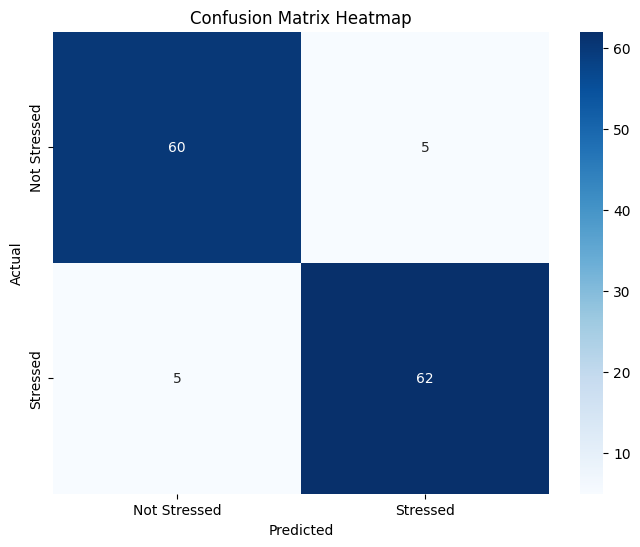

In [106]:
#laver Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_cv)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Stressed', 'Stressed'], yticklabels=['Not Stressed', 'Stressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

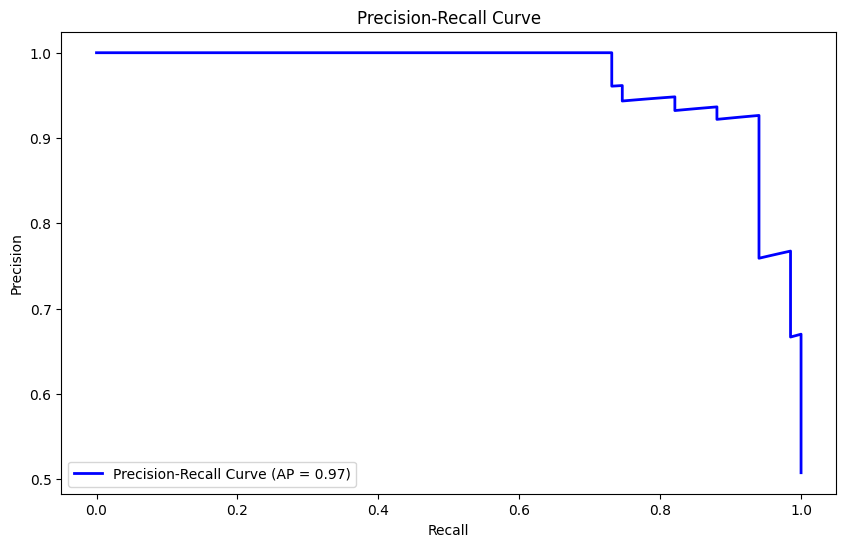

In [107]:
#Brug cross_val_predict med sandsynligheder
y_pred_cv = cross_val_predict(rnd_clf, X, y, cv=5, method="predict_proba")[:, 1]  # Sandsynligheder for positiv klasse


#Beregn Precision-Recall og plot
precision, recall, thresholds_pr = precision_recall_curve(y, y_pred_cv)
average_precision = average_precision_score(y, y_pred_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
#AP = Average Precision. Er et mål for modellens præcision over forskellige niveauer af recall. Det er et tal mellem 0 og 1, hvor en højere værdi indikerer, at modellen er bedre til at finde positive eksempler uden at inkludere mange falske positive.

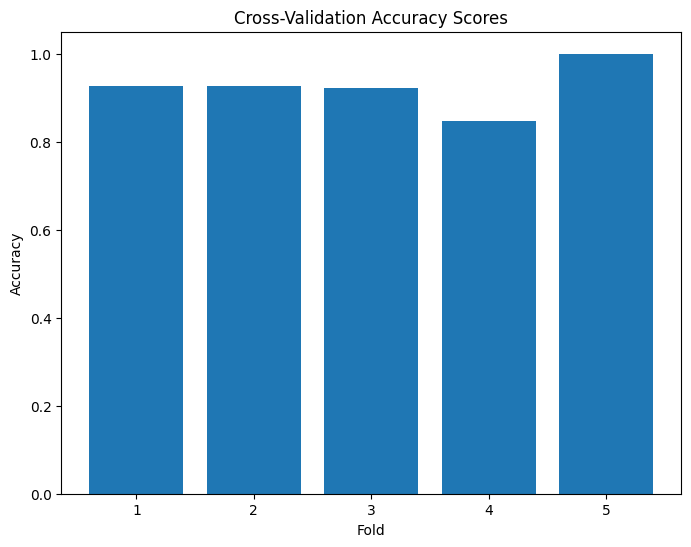

In [108]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

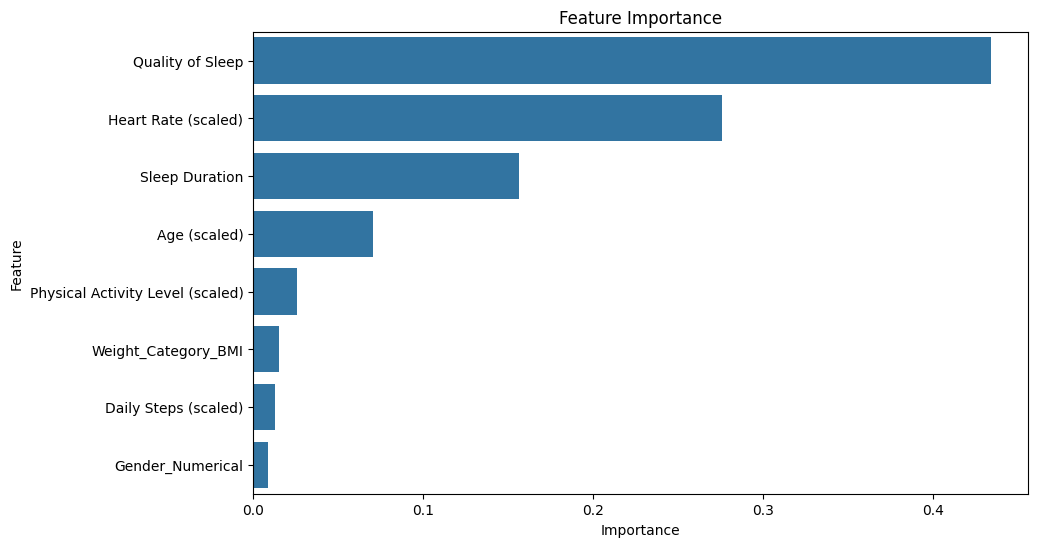

In [109]:
rnd_clf.fit(X, y)  # Fit modellen på hele datasættet for at få feature importance
feature_importances = pd.Series(rnd_clf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Visualisering
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [110]:
import joblib

#  Gemme modellen
joblib.dump(rnd_clf, "stress_model_RF.joblib")
print("Modellen er gemt")

Modellen er gemt
